In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [30]:
file_path = 'C:/Users/HP/Downloads/titanic.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

## Dataset Overview

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [32]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [33]:
df.shape

(891, 12)

In [34]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [35]:
df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

# Categorical Columns
## Survived, PClass, Sex, SibSp (siblings/spouses), Parch(parents/children),Embarked

# Numerical Columns
## Age, Fare, PassengerId

# Mixed Columns
## Name, Ticket, Cabin

In [36]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [37]:
df.drop(columns=["Cabin"],inplace = True)

In [38]:
df["Age"].fillna(df["Age"].mean(),inplace = True)

In [39]:
df["Embarked"].value_counts()

df["Embarked"].fillna("S",inplace = True)

## At this point, we have taken care of all the missing data that we had. Now we are changing the datatype of the following columns using the as type method since they were inappropriate

In [22]:
Survived(int to category)
Pclass(int to category)
Sex(object to category)
Age(float to int)
Embarked(object to category)

'Survived(int to category)\nPclass(int to category)\nSex(object to category)\nAge(float to int)\nEmbarked(object to category)'

In [41]:
df['Survived'] = df['Survived'].astype('category')
df["Pclass"] = df["Pclass"].astype(str)
df['Sex'] = df['Sex'].astype('category')
df['Age'] = df['Age'].astype('int') 
df['Embarked'] = df['Embarked'].astype('category')

## Again running the info function to see the desired changes. Here we can notice that: Now there are no missing values. We have changed the datatype of the columns that had inappropriate data types. Our memory usage has also reduced

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    object  
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          891 non-null    int32   
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Embarked     891 non-null    category
dtypes: category(3), float64(1), int32(1), int64(3), object(3)
memory usage: 55.3+ KB


# Univariate Analysis: 
## It refers to the analysis of one variable. Its purpose is to understand the distribution of values for a single variable. 
## Let's start with the overall survival ratio

<Axes: ylabel='count'>

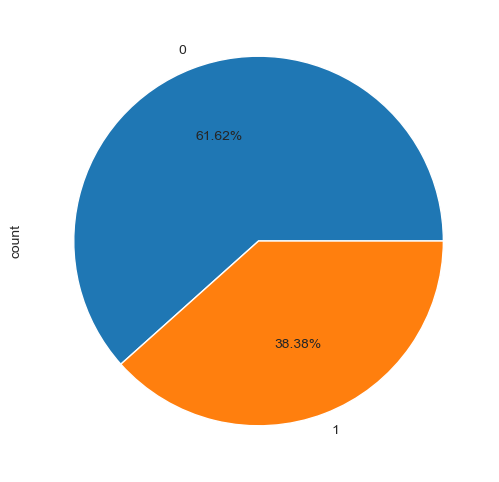

In [43]:
fig=plt.figure(figsize=(6,6))
df['Survived'].value_counts().plot.pie(autopct='%1.2f%%')

# Conclusion: Out of 891 passengers, 62% passengers died in the accident.

Pclass
3    55.106622
1    24.242424
2    20.650954
Name: count, dtype: float64


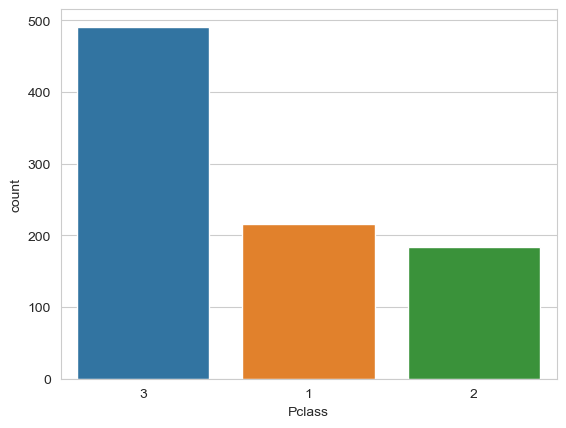

In [44]:
# Passenger class column
print((df['Pclass'].value_counts()/891)*100)
sns.countplot(x='Pclass', data = df)
plt.show()

# Conclusion: 
## Most passengers were from class 3rd.

Sex
male      64.758698
female    35.241302
Name: count, dtype: float64


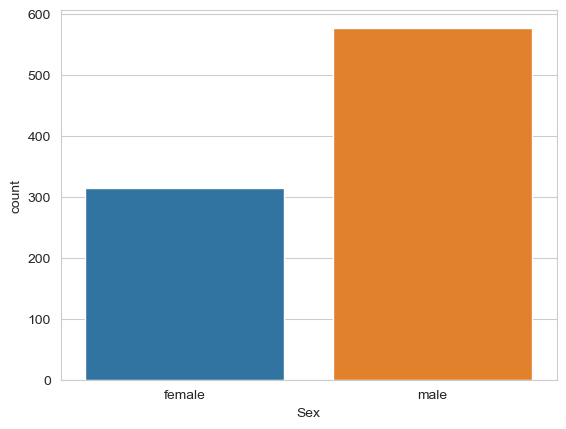

In [45]:
print((df['Sex'].value_counts()/891)*100)
sns.countplot(x='Sex', data = df)
plt.show()

## It shows the count of males and females. Out of 100 people 65 were males, and 35 were females.

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64


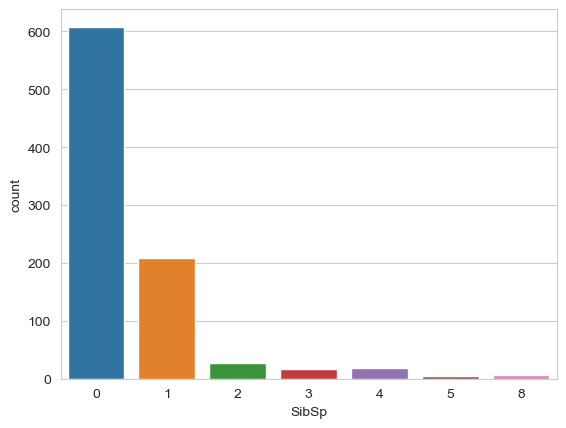

In [46]:
# Sibsp = Siblings / spouses
print(df['SibSp'].value_counts())
sns.countplot(x='SibSp', data = df)
plt.show()

## This shows that the passengers who were travelling alone were much more in number than the ones who were travelling with siblings or with spouses.

Embarked
S    72.502806
C    18.855219
Q     8.641975
Name: count, dtype: float64


<Axes: xlabel='Embarked', ylabel='count'>

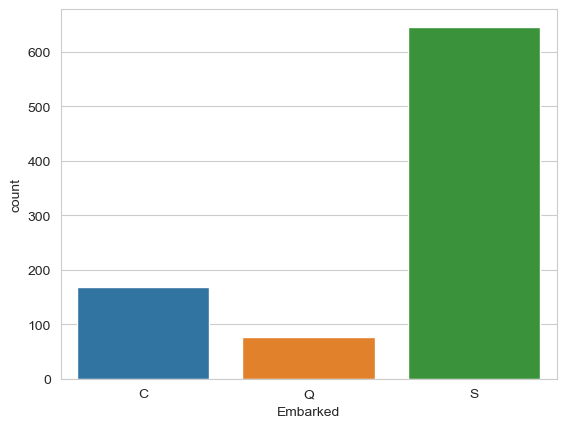

In [47]:
#Embarked = These were the three destination where Titanic was headed, Part of Embarkation C= Cherbourg, Q=Queenstown and S=Southampton
print((df['Embarked'].value_counts()/891)*100)
sns.countplot(x='Embarked', data = df)

## Maximum passengers were headed to Southampton city

0.45956263424701577


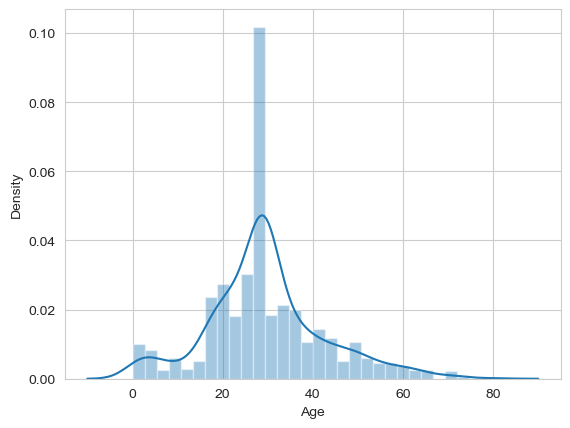

In [48]:
#Age column:
sns.set_style('whitegrid')
sns.distplot(df['Age'], kde = True, bins = 30)
print(df['Age'].skew())

## Here we have plotted a displot (distribution plot) for the “Age” column. It’s very close to normal distribution which is a good thing.
## The skew of “Age” is around .43 which is normal. Skewness that values between -0.5 and +0.5 are considered negligibly skewed. In simple words, this can be considered a normal distribution (which is a good thing) By looking at the displot we can say that most of the passengers were in between the age range of 20–40.

<Axes: xlabel='Age'>

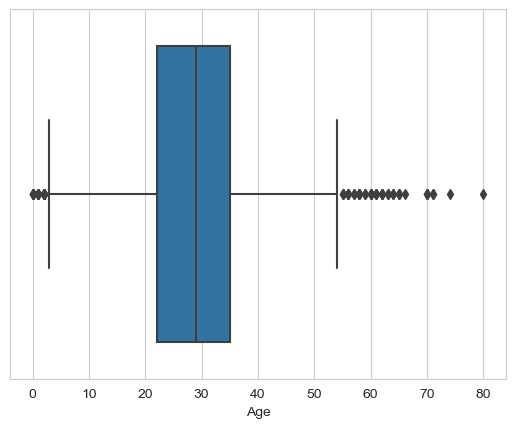

In [49]:
sns.boxplot(x=df["Age"])

## Box Plot - It is also known as Whisker plot and it is created to display the summary of the set of data values having properties like minimum, first quartile, median, third quartile and maximum.
## Here it shows that our interquartile range is between 20–40. Passengers above the age of 65 are considered to be outliers.

<Axes: ylabel='Density'>

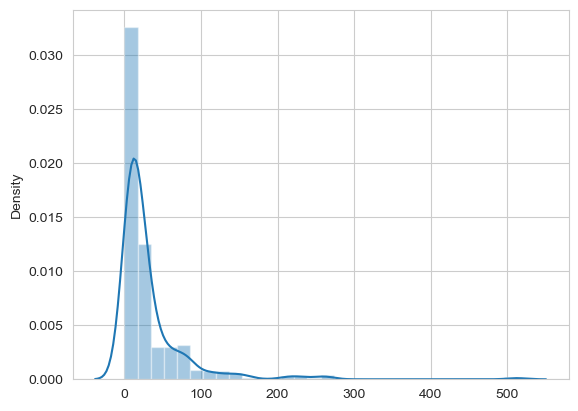

In [50]:
sns.distplot(x=df['Fare'],kde=True,bins=30)

## Plotting displot on Fare column. By looking at it, we can say it is skewed very much to the right and what it means is that there are a lot of passengers who have bought tickets with low prices.

In [51]:
print("People who have spent between $0 and $100 in tickets:", df[(df["Fare"] > 0) & (df["Fare"] < 100)].shape[0])
print("People who have spent more than $100 on ticket:", df[df["Fare"] > 100].shape[0])

People who have spent between $0 and $100 in tickets: 823
People who have spent more than $100 on ticket: 53


# Multi-varite analysis

Survived,0,1
Pclass,,
1,37.0,63.0
2,52.7,47.3
3,75.8,24.2


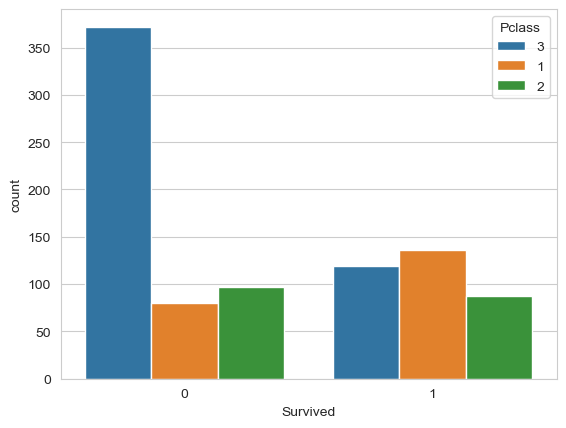

In [52]:
#Survival with Pclass
sns.countplot(x=df["Survived"], hue=df["Pclass"])
pd.crosstab(df["Pclass"], df["Survived"]).apply(lambda r: round((r/r.sum())*100, 1), axis=1)

## From the crosstab (table), we can see that:
## In Pclass 1 — 37% of people had died and 63% had survived
## In Pclass 2 — 52% of people had died and 47% had survived
## In Pclass 1 – 75% of people had died and 24% had survived

Survived,0,1
Sex,,
female,25.8,74.2
male,81.1,18.9


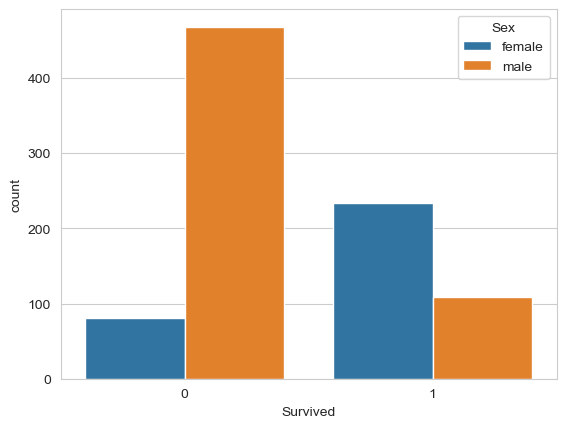

In [53]:
#Survival with Sex (Gender)
sns.countplot(x=df["Survived"], hue=df["Sex"])
pd.crosstab(df["Sex"], df["Survived"]).apply(lambda r: round((r/r.sum())*100, 1), axis=1)

## We can see that 25% of females had died and 75% have survived. 
## For males, 81% had died and 19% had survived.

<Axes: xlabel='Age', ylabel='Density'>

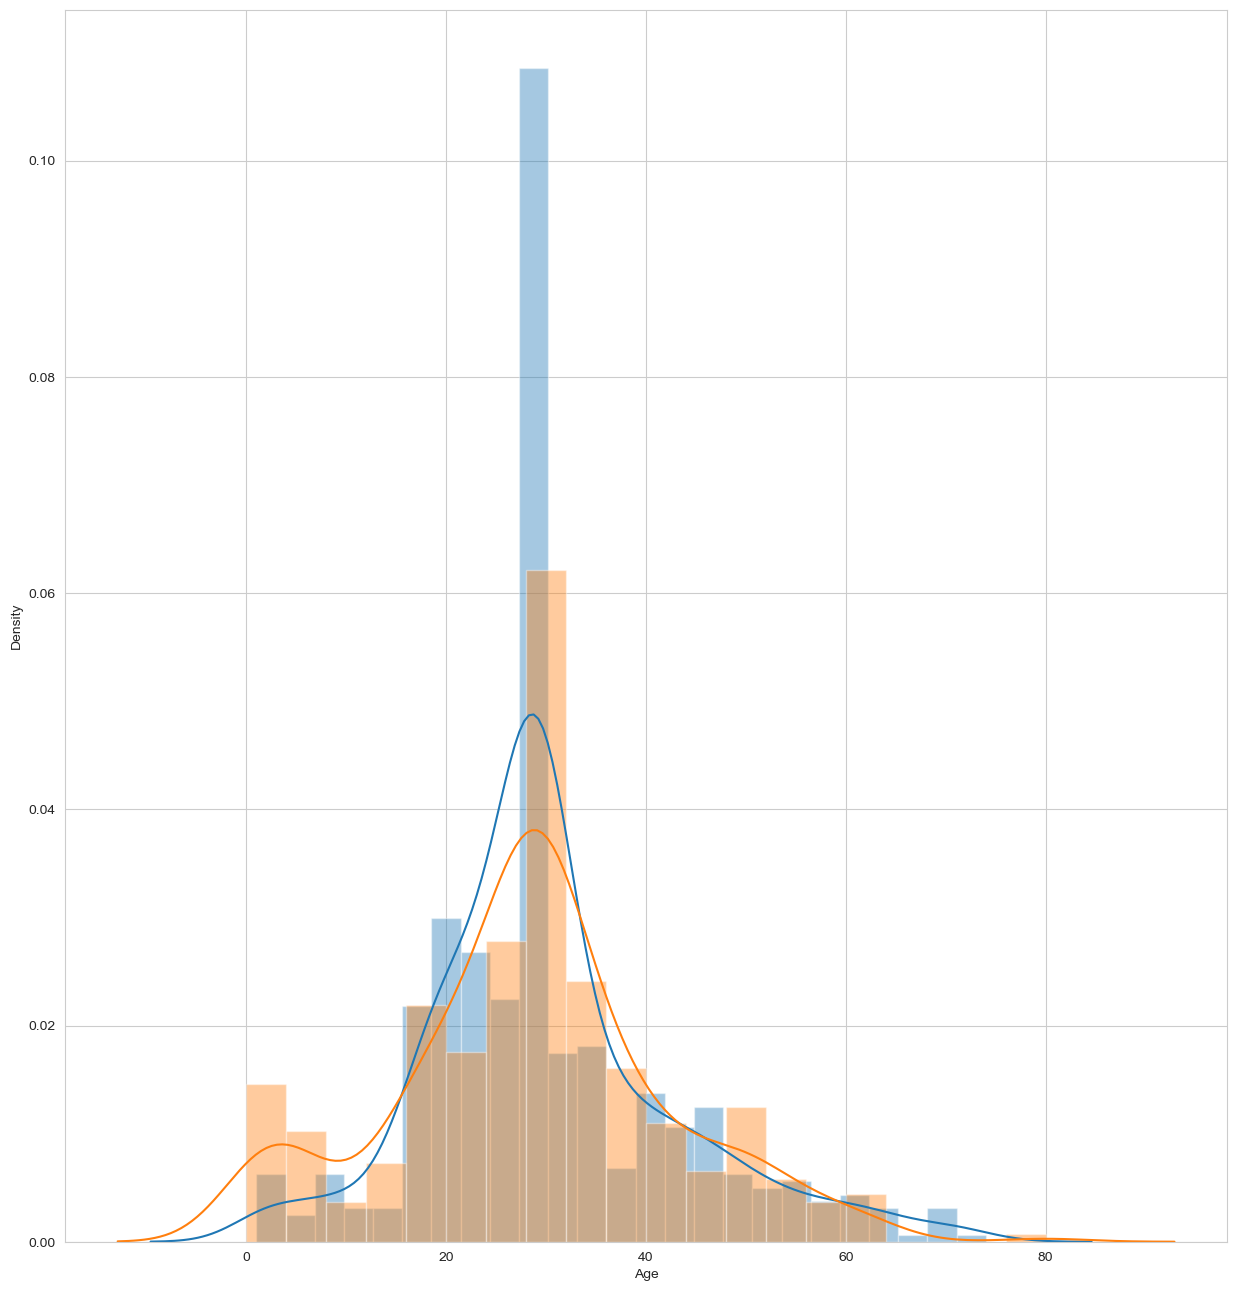

In [55]:
#Survived with Age. #Blue colour = Died, #Orange colour = Survived
plt.figure(figsize=(15,16))
sns.distplot(df[df["Survived"]==0]["Age"])
sns.distplot(df[df["Survived"]==1]["Age"])

<Axes: xlabel='Fare', ylabel='Density'>

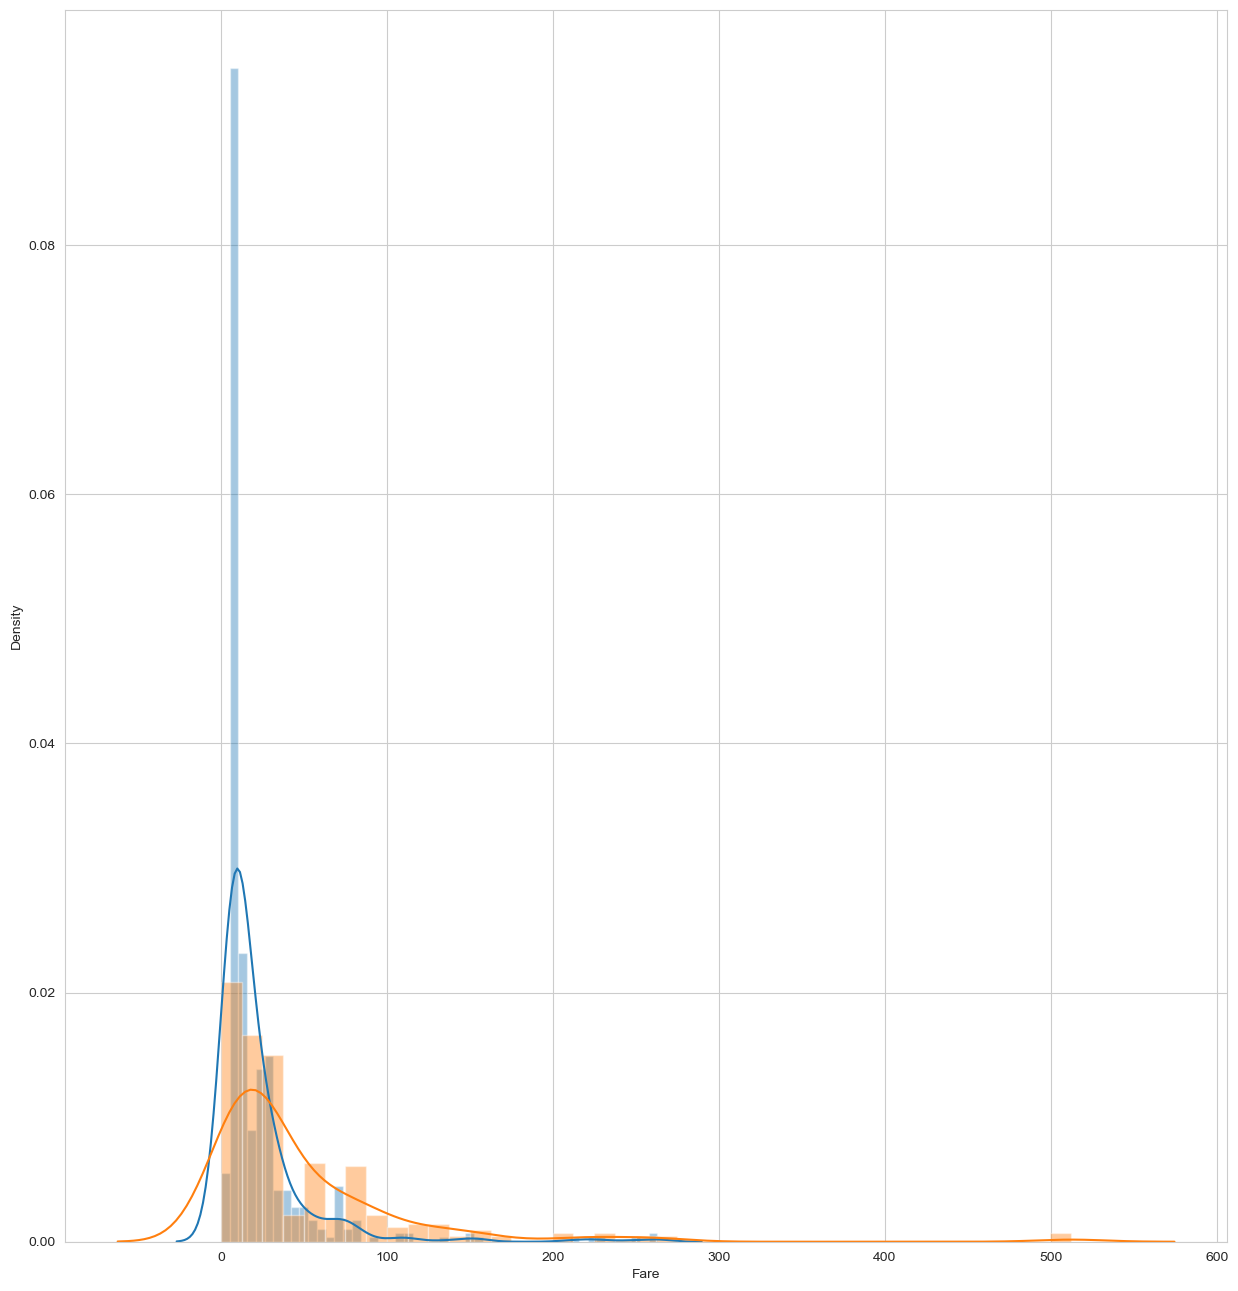

In [57]:
#Survived with Fare
plt.figure(figsize=(15,16))
sns.distplot(df[df["Survived"]==0]["Fare"])
sns.distplot(df[df["Survived"]==1]["Fare"])

## By looking at the distplot we can say that the people who were travelling with lower fares had a higher probability of dying than surviving and where the value of fare is more, the probability of surviving is constantly higher than dying.

# Correlation Heatmap
## We are finding out the correlation between all the numerical columns and plotting it on a Heatmap.

<Axes: >

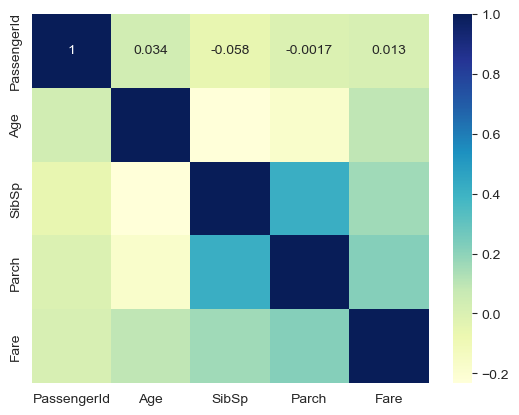

In [60]:
numeric_columns = df.select_dtypes(include='number')
correlation_matrix = numeric_columns.corr()
sns.heatmap(correlation_matrix, cmap="YlGnBu", annot=True)

## There is a high correlation between SibSp and Parch Also, there is a high correlation between Parch and fare.

# Drawing Conclusions
## The chance of female survival was higher than male survival.
## Travelling in Pclass 3 was the deadliest.
## Somehow, passengers going to Cherbourg survived more.
## Passengers in the age range of 20 to 40 had less chance of surviving.
## Passengers travelling with smaller families had a higher chance of surviving in comparison to passengers with large families and the ones who were travelling alone.